In [21]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [22]:
df = pd.read_csv('/content/population.csv')

In [23]:
df.head(3)

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km�,Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050.0,0.23,3711367.0,NaN,38.1,2.24,551.0,53.5,876613025.0,16.84,9.735034e+09,1.0,1.639176e+09
1,2045.0,0.35,5585537.0,-414772.0,36.6,2.24,545.0,50.1,811749463.0,17.09,9.481803e+09,1.0,1.620619e+09
2,2040.0,0.50,7793541.0,-415736.0,35.0,2.24,536.0,46.7,744380367.0,17.31,9.198847e+09,1.0,1.592692e+09


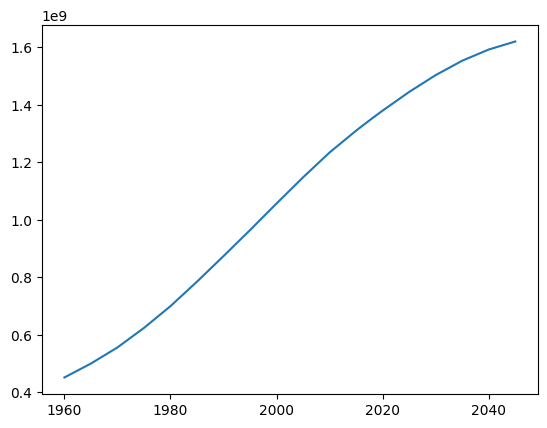

In [34]:
import matplotlib.pyplot as plt

plt.plot(df['Year'], df['Population'])

In [24]:
df.dtypes

,0
Year,float64
Yearly % \nChange,float64
Yearly\nChange,float64
Migrants (net),float64
Median Age,float64
Fertility Rate,float64
Density (P/Km�,float64
Urban\nPop %,float64
Urban Population,float64
Country's Share of\nWorld Pop,float64


In [25]:
df = df.astype(np.float64)

In [26]:
df.isnull().sum()

,0
Year,1
Yearly % \nChange,1
Yearly\nChange,1
Migrants (net),2
Median Age,1
Fertility Rate,1
Density (P/Km�,1
Urban\nPop %,1
Urban Population,1
Country's Share of\nWorld Pop,1


In [27]:
df.rename(columns={'Migrants (net)':'Migrants_(net)'},inplace=True)
df=df.dropna()


In [28]:
df.isnull().sum()

,0
Year,0
Yearly % \nChange,0
Yearly\nChange,0
Migrants_(net),0
Median Age,0
Fertility Rate,0
Density (P/Km�,0
Urban\nPop %,0
Urban Population,0
Country's Share of\nWorld Pop,0


In [29]:
X = df.drop('Population', axis=1)
y = df['Population']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=92)

In [31]:
tf.random.set_seed(43)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(1, activation ='relu')
])

model.compile( loss = tf.keras.losses.MeanSquaredLogarithmicError,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))

model.fit(X_train, y_train, epochs=100,verbose = 1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2024
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5979
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0070
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1645
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2863
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2815
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1851
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0786
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0170
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0098
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0559
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1020
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0952
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0494
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0120
Epoch 16/100
1/1 ━━━

In [32]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.0013


0.0012558182934299111